## Electricity Consumption Exploration

---

![](https://images.unsplash.com/photo-1487875961445-47a00398c267?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1650&q=80)
Photo by [Jason Blackeye](https://unsplash.com/photos/nyL-rzwP-Mk)

In this exercise, you will be asked to explore time series data in several ways.

You will be working with time series of Open Power System Data ([OPSD](https://open-power-system-data.org/)) for Germany. 

The data set includes daily electricity consumption, wind power production, and solar power production between 2006 and 2017. 
```
- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh
```

# Data Exploration

In [304]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [305]:
# Load file
df = pd.read_csv("opsd_germany_daily.csv", index_col=0)
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [306]:
# Description
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


Then, make sure to transform the dates into datetime format in pandas :

In [307]:
# Transform the dates into datetime format
df.index = pd.to_datetime(df.index)

type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

### 1. Plotting and understanding a time series

Q1 - Plot the different time series. What do you understand, what do you notice ?

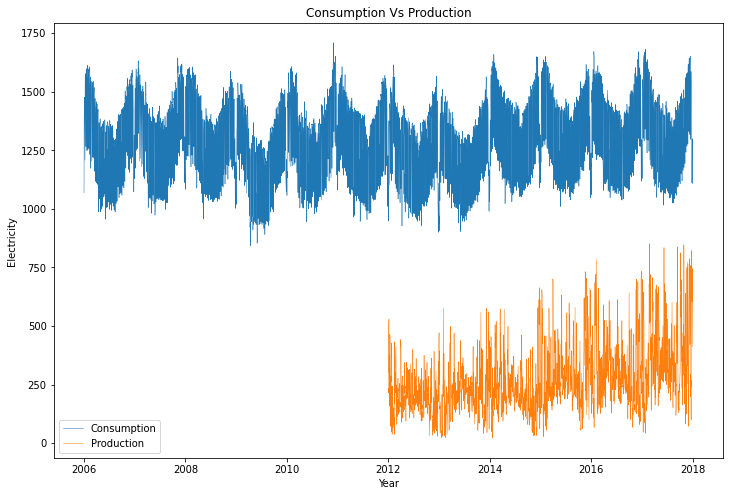

In [308]:
plt.figure(figsize=(12,8))
plt.plot(df.index, df["Consumption"], label="Consumption", linewidth=0.5)
plt.plot(df.index, df["Wind+Solar"], label="Production",linewidth=0.5)
plt.title("Consumption Vs Production")
plt.xlabel("Year")
plt.ylabel("Electricity")
plt.legend()
plt.show()

There is significantly lower production in solar and wind compared to consumption across 2012-2018. Production data for these renewable sources are only recorded froim 2012 onwards. Evidently, it can be assumed there are other sources of production more significantly used than wind and solar to meet the consumer demand. Over a single year, there is a clear up down trend in consumption where the seasonality may effect the consumption. This is repeated periodically each year, signifying the effect of seasons on electricity consumption. Production has also increased overall from 2012 to 2018 recorded data, indicating improving weather conditions for production or improved resources and technologies to allow fo production. 

We can also avoid plotting lines and simply plot dots for the consumption :

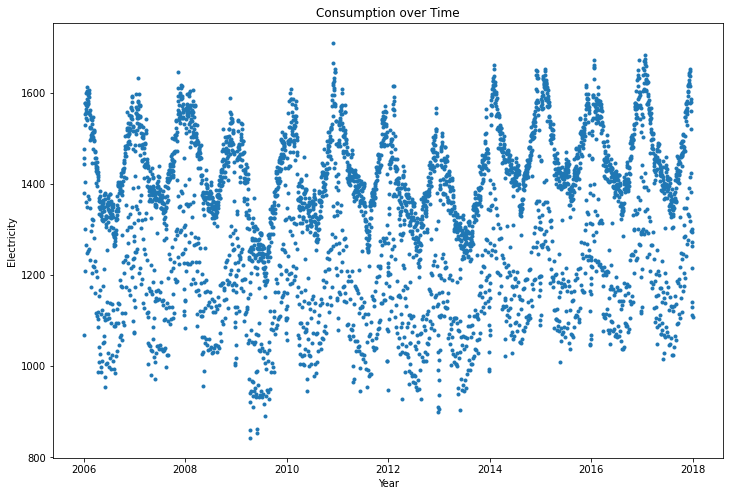

In [309]:
plt.figure(figsize=(12,8))
plt.plot(df.index, df["Consumption"], linestyle="None", marker=".")
plt.title("Consumption over Time")
plt.xlabel("Year")
plt.ylabel("Electricity")
plt.show()

And plot the production over time :

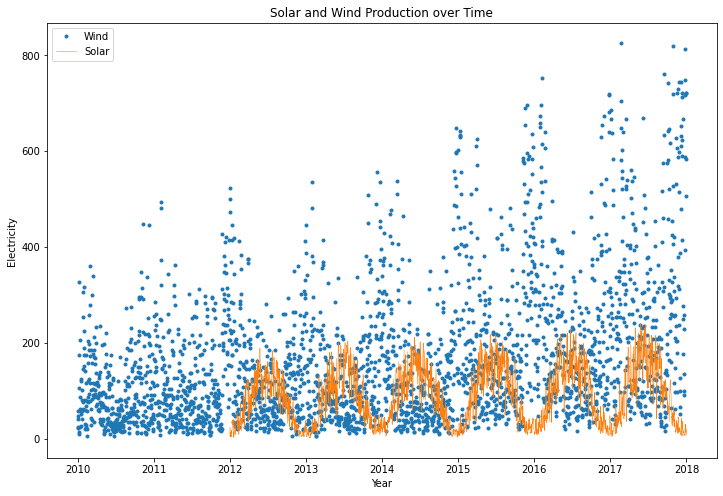

In [310]:
plt.figure(figsize=(12,8))
plt.plot(df.index, df["Wind"], linestyle="None", marker=".", label="Wind")
plt.plot(df.index, df["Solar"], label="Solar", linewidth=0.5)
plt.title("Solar and Wind Production over Time")
plt.xlabel("Year")
plt.ylabel("Electricity")
plt.legend()
plt.show()

What can we notice ?
+ the consumption is larger than the production
+ we have no overall production data before 2012
+ the production and the consumption are both seasonal, i.e. they vary within a year given some pattern
+ there is a trend in production (the higher part), and outliers downwards

How do consumption and production compare ?
+ We notice that wind bsaed production increases over time, and is rather high in winter (for example more storms).
+ On the other hand, the solar production is higher in summer (seems logic)
+ The consumption is higher in winter

Evidently, the consumption is significantly higher than the production rates for electricity. As previously mentioned, this may be due to more commonly used production methods for electricity other than wind and solar. For wind vs solar production, it is evident there is much more wind production with higher electricity units produced. Solar production also started later only from 2012. The production and consumption is evidently seasonal with seasonal periodic patterns of data with peaks and troughs during specific months. There is increasing production in wind as well from 2010 to 2018. Seasonally, it appears solar production peaks in summer where winter production troughes, and alternatively, wind production peaks in winter and solar is trough. The consumption overall peaks in the winter, where it can be assumed the Germany electricity load is higher due to heaters and indoor reasons to stay inside for the season. 

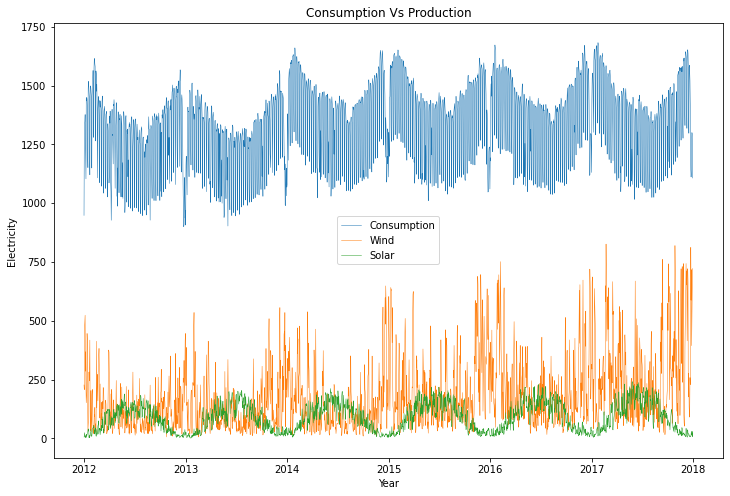

In [311]:
plt.figure(figsize=(12,8))
plt.plot(df.loc["2012-01":"2017-12"]["Consumption"], label="Consumption", linewidth=0.5)
plt.plot(df.loc["2012-01":"2017-12"]["Wind"], label="Wind", linewidth=0.5)
plt.plot(df.loc["2012-01":"2017-12"]["Solar"], label="Solar", linewidth=0.5)
plt.title("Consumption Vs Production")
plt.xlabel("Year")
plt.ylabel("Electricity")
plt.legend()
plt.show()

### 2. Change the scale

Q2 - Try to change the scale to understand the recurrent patterns !

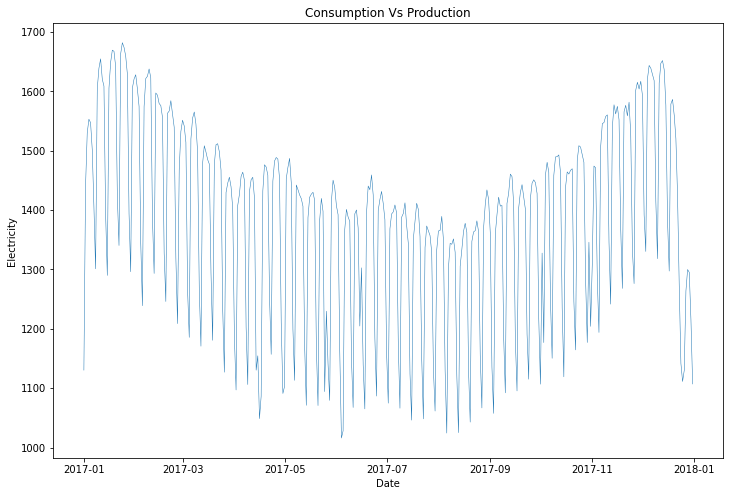

In [312]:
# Plot over the year
plt.figure(figsize=(12,8))
plt.plot(df.loc["2017-01":"2018-01"]["Consumption"], label="Consumption", linewidth=0.5)
plt.title("Consumption Vs Production")
plt.xlabel("Date")
plt.ylabel("Electricity")
plt.show()

It confirms the trend : more consumption in winter time, and less in summer. We can then zoom on a given month :

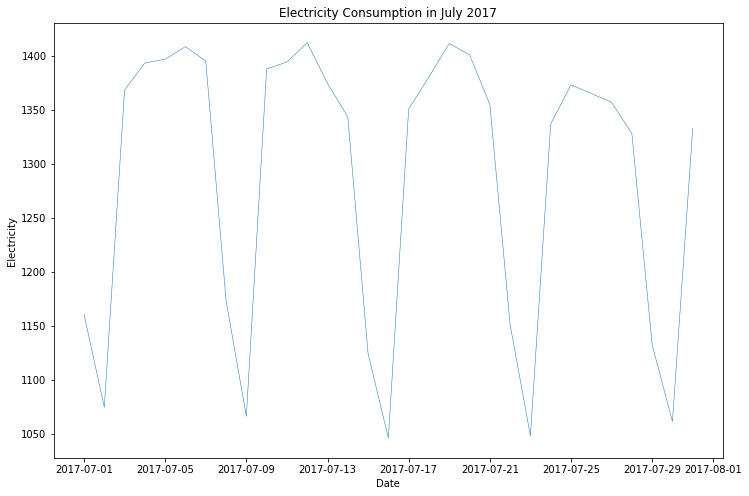

In [313]:
# Plot over a month
plt.figure(figsize=(12,8))
plt.plot(df.loc["2017-07-01":"2017-07-31"]["Consumption"], linewidth=0.5)
plt.title("Electricity Consumption in July 2017")
plt.xlabel("Date")
plt.ylabel("Electricity")
plt.show()

When zooming on a month, we oberve another seasonality. There seems to be days of the week in which people consume less. For example, here's what happens when we highlight Sundays :

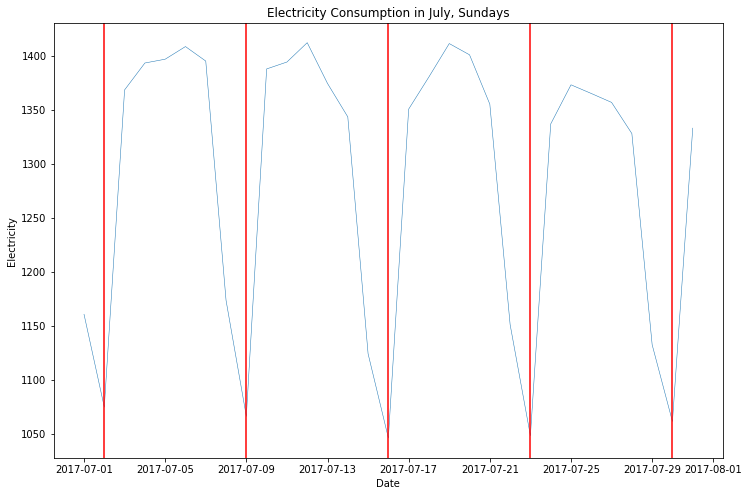

In [314]:
# Plot on Sundays
plt.figure(figsize=(12,8))
plt.plot(df.loc["2017-07-01":"2017-07-31"]["Consumption"], linewidth=0.5)
plt.axvline(pd.to_datetime("2017-07-2"), color="red")
plt.axvline(pd.to_datetime("2017-07-9"), color="red")
plt.axvline(pd.to_datetime("2017-07-16"), color="red")
plt.axvline(pd.to_datetime("2017-07-23"), color="red")
plt.axvline(pd.to_datetime("2017-07-30"), color="red")
plt.title("Electricity Consumption in July, Sundays")
plt.xlabel("Date")
plt.ylabel("Electricity")
plt.show()

### 3. Further exploration

Q3 - To further explore the dataset, we might need to group the data. Create new columns for the consumption (by year and month), and create box-plots with seaborn. Comment on your results.

In [315]:
# new columns 'year' and 'month'
df_2 = df.reset_index()
df_2['year'] = [ date.year for date in df_2.Date ]
df_2['month'] = [ date.strftime("%b") for date in df_2.Date ]
years = df_2['year'].unique()
print(years)
df_2.head()

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


,Date,Consumption,Wind,Solar,Wind+Solar,year,month
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,Jan
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,Jan
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,Jan
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,Jan
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,Jan


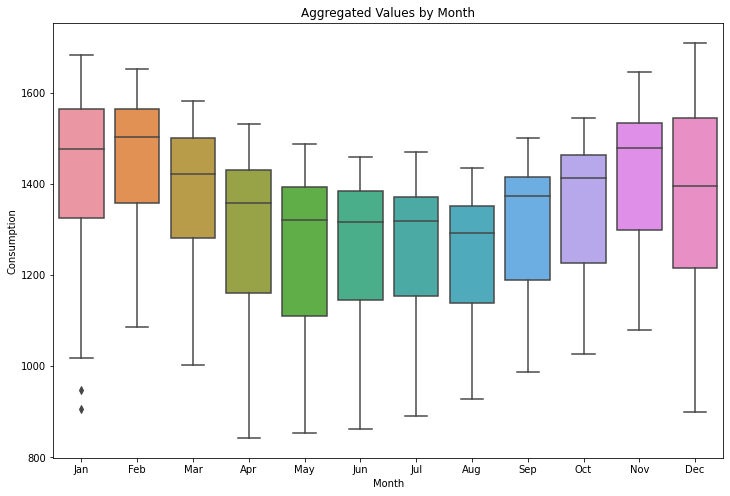

In [316]:
# Boxplot year
import seaborn as sns

plt.figure(figsize=(12,8))
sns.boxplot(x="month", y="Consumption", data=df_2)
plt.title("Aggregated Values by Month")
plt.ylabel("Consumption")
plt.xlabel("Month")
plt.show()

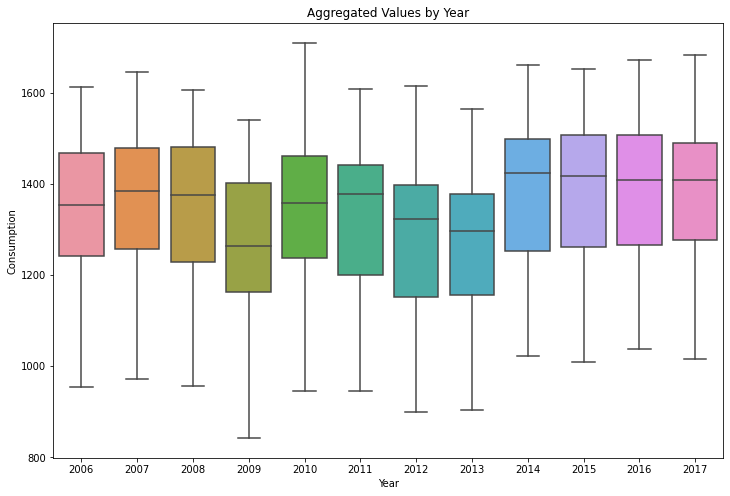

In [317]:
# Boxplot month
plt.figure(figsize=(12,8))
sns.boxplot(x="year", y="Consumption", data=df_2)
plt.title("Aggregated Values by Year")
plt.ylabel("Consumption")
plt.xlabel("Year")
plt.show()

Evidently, the aggregates values by month represent the seasonal trend of electricity data. There is an overall decrease and minimum during and approaching the summer months, where the absolute minimumm is achieved in april. The interquartile range is lower than other months, indicating the statistics are lower during the summer, where less electricity is consumed. When observing the data by year, there is an unclear trend of yearly specific consumptions. The absolute minimum is achieved in 2009, and this year shows an overall decrease in consumption. It could be assumed the consumption was effected in this year due to weather conditions, economic factors, population changes, technological changes, regulatory or policy changes, or behavioural changes. The consumption then drastically increases inm 2010, reaching an overall maximum and increased values. This may indicate the 2009 data is an outlier and inaccurately recorded. The overall yearly trends are increasing and decreasing with unclear trends or reasons. Future prediction or more data is necessary to make accurate conclusions.

### 4. Fill missing values

Q4 - Do you face missing values in production ? If yes, which method can you apply ? What happens if you plot the modified data ? It is a good idea to keep the data this way ?

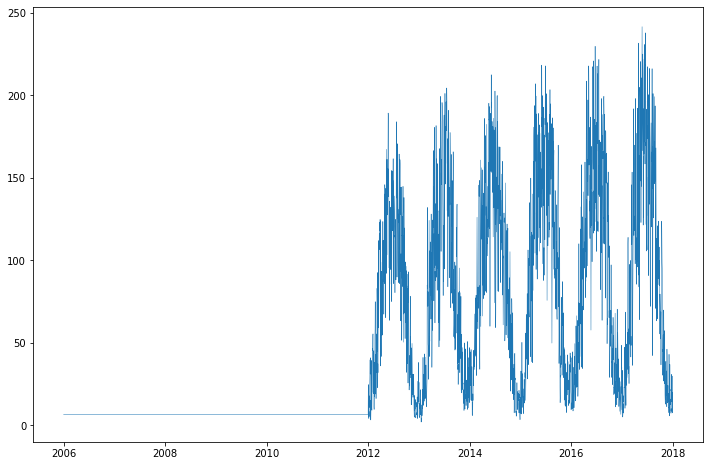

In [318]:
# Plot Solar
plt.figure(figsize=(12,8))
plt.plot(df["Solar"].bfill(axis=0), linewidth=0.5)
plt.show()

The forward and backward fill are useful when some values are missing within the data, not when we miss years of data. This is a clear illustration.

Backfill (bfill) or forward fill (ffill) can be used to fill missing values using the next or previous known values. However, for missing years of data, these methods are generally not suitable as they can inaccurately represent the trends and variability in solar production, especially over a long period. For shorter gaps, interpolation might be used to estimate missing values based on nearby data points. However, this is not appropriate for filling several years of missing data because the interpolation would be highly speculative and might not accurately reflect the true values. This is evident as solar is only first recorded in 2012. 

Keeping computed data based on estimation or prediction for such drastic lack of data is not a good idea.  Any analysis conducted on this basis may be misleading, affecting decisions or scientific findings that depend on the historical accuracy of solar production data. It also impacs the data integrity where filling them in may suggest more knowledge than existing. For planning and forecasting, reliance on inaccurately imputed data could lead to suboptimal or erroneous decision-making.

It’s better to acknowledge the lack of data before 2012 and focus analyses on the period for which data is available. For analytical purposes, leaving the data as missing and handling it accordingly in your analyses usually maintains the integrity and reliability of the data.

### 5. Series correlation

Q5 - A good way to explore time series, when you have several series, is to plot one series vs another. This is a good way to estimate the correlation between 2 series. Plot the relevant graphs (and compute the correlation) for wind + solar vs consumption, wind vs solar, wind vs consumption, and solar vs consumption.

In [319]:
#define filtered dataframes
consumption = df["Consumption"]["2012-01-01":]
production = df["Wind+Solar"]["2012-01-01":]
solar_prod = df["Solar"]["2012-01-01":]
wind_prod = df["Wind"]["2012-01-01":]

In [320]:
# Correlation between consumption and overall production
consump_product_corr = consumption.corr(production)
print("Consumption Production Correlation: ", consump_product_corr)

Consumption Production Correlation:  0.027647843859240944


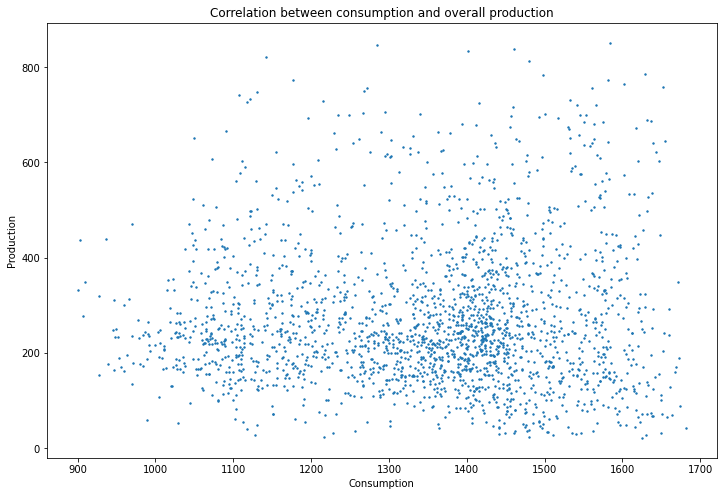

In [321]:
# Plot
plt.figure(figsize=(12,8))
plt.scatter(consumption, production, s=2)
plt.title("Correlation between consumption and overall production")
plt.xlabel("Consumption")
plt.ylabel("Production")
plt.show()

In [322]:
# Correlation between solar production and wind production
solar_wind_corr = solar_prod.corr(wind_prod)
print("Solar and Wind Production Correlation: ", solar_wind_corr)

Solar and Wind Production Correlation:  -0.30883182959773403


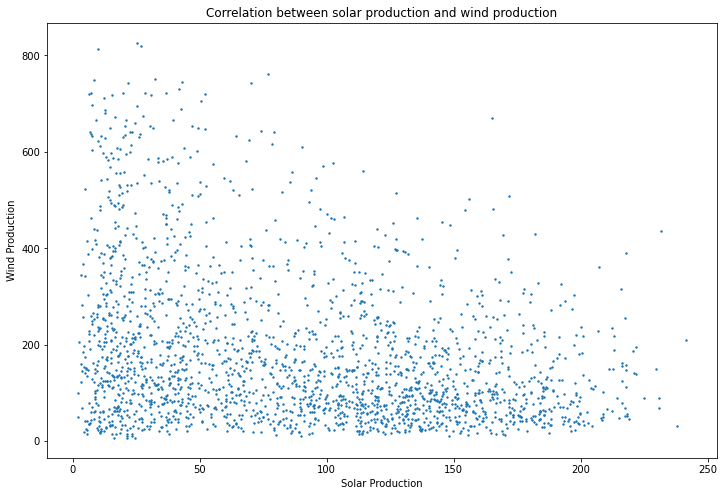

In [323]:
# Plot
plt.figure(figsize=(12,8))
plt.scatter(solar_prod, wind_prod, s=2)
plt.title("Correlation between solar production and wind production")
plt.xlabel("Solar Production")
plt.ylabel("Wind Production")
plt.show()

In [324]:

# Correlation between consumption and wind production
wind_consump_corr = consumption.corr(wind_prod)
print("Wind Production and Consumption Correlation", wind_consump_corr)


Wind Production and Consumption Correlation 0.13518640075918514


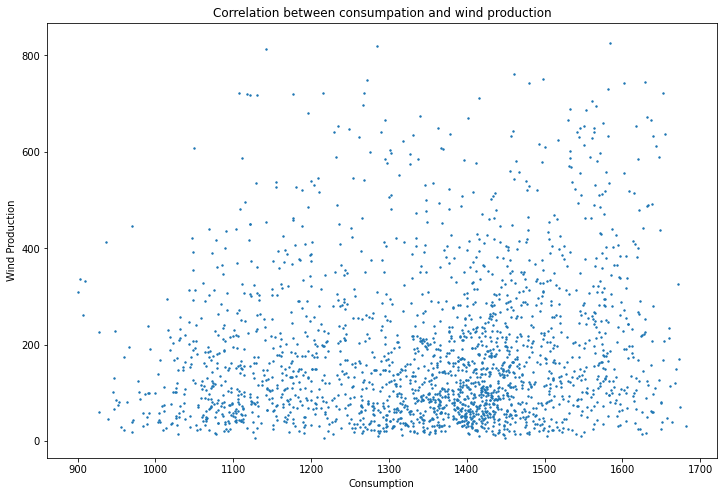

In [325]:
# Plot
plt.figure(figsize=(12,8))
plt.scatter(consumption, wind_prod, s=2)
plt.title("Correlation between consumpation and wind production")
plt.xlabel("Consumption")
plt.ylabel("Wind Production")
plt.show()

In [326]:
# Correlation between consumption and solar production
solar_consump_corr = consumption.corr(solar_prod)
print("Consumption and Solar Production Correlation: ", solar_consump_corr)

Consumption and Solar Production Correlation:  -0.2789426551991437


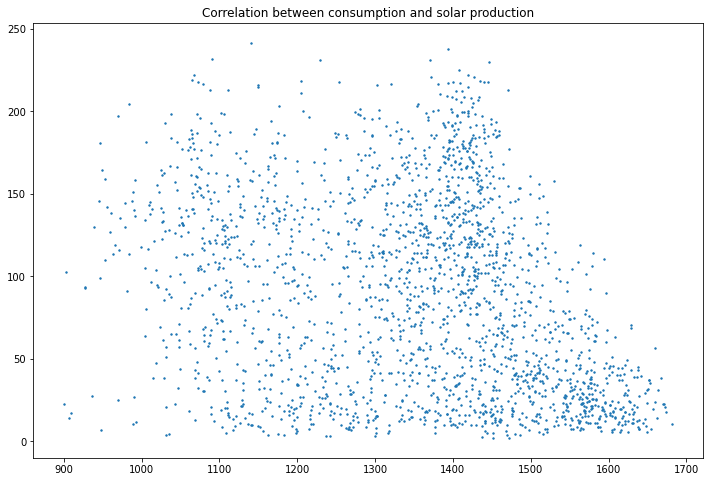

In [327]:
# Plot
plt.figure(figsize=(12,8))
plt.scatter(consumption, solar_prod, s=2)
plt.title("Correlation between consumption and solar production")
plt.show()